# Image Processing 2: Manipulation Detection

Colin Jemmott, September 2018 for UC San Diego DSC 96.

### Project

The goal of this project is to implement an algorithm called `Error Level Analysis` that can provide hints about whether or not an image has been manipulated (aka "Photoshopped").

The algorithm is described in section 3.4.2 of ["A Picture's Worth... Digital Image Analysis and Forensics, Version 2"](http://blackhat.com/presentations/bh-dc-08/Krawetz/Whitepaper/bh-dc-08-krawetz-WP.pdf) by Neal Krawetz. 

Once you get your implementation of the algorithm working, run it on the provided images `bear.jpg`, `geisel.jpg` and `beach.jpg`, as well as a few `.jpg` images that you think might be manipulated.  Explain the results.

### Learning Objectives

A big part of being a data scientist is having a problem, finding some relevant research, and implementing that research to test if it will work as a solution to your problem.


### Hints

Reading all of section 3.4.2 of "A Picture's Worth..." will help you to understand and explain your results.

More unusual [Pillow](https://pillow.readthedocs.io/en/5.2.x/) functions that I found helpful include `ImageChops` and `ImageEnhance`.  Of course, multiple solutions are possible, so don't feel the need to use those.

### Stretch Goal

If you finish early, look at some other image manipulation detection algorithms in [Krawetz](http://blackhat.com/presentations/bh-dc-08/Krawetz/Whitepaper/bh-dc-08-krawetz-WP.pdf) and implement those also.


Maximum difference was = 14


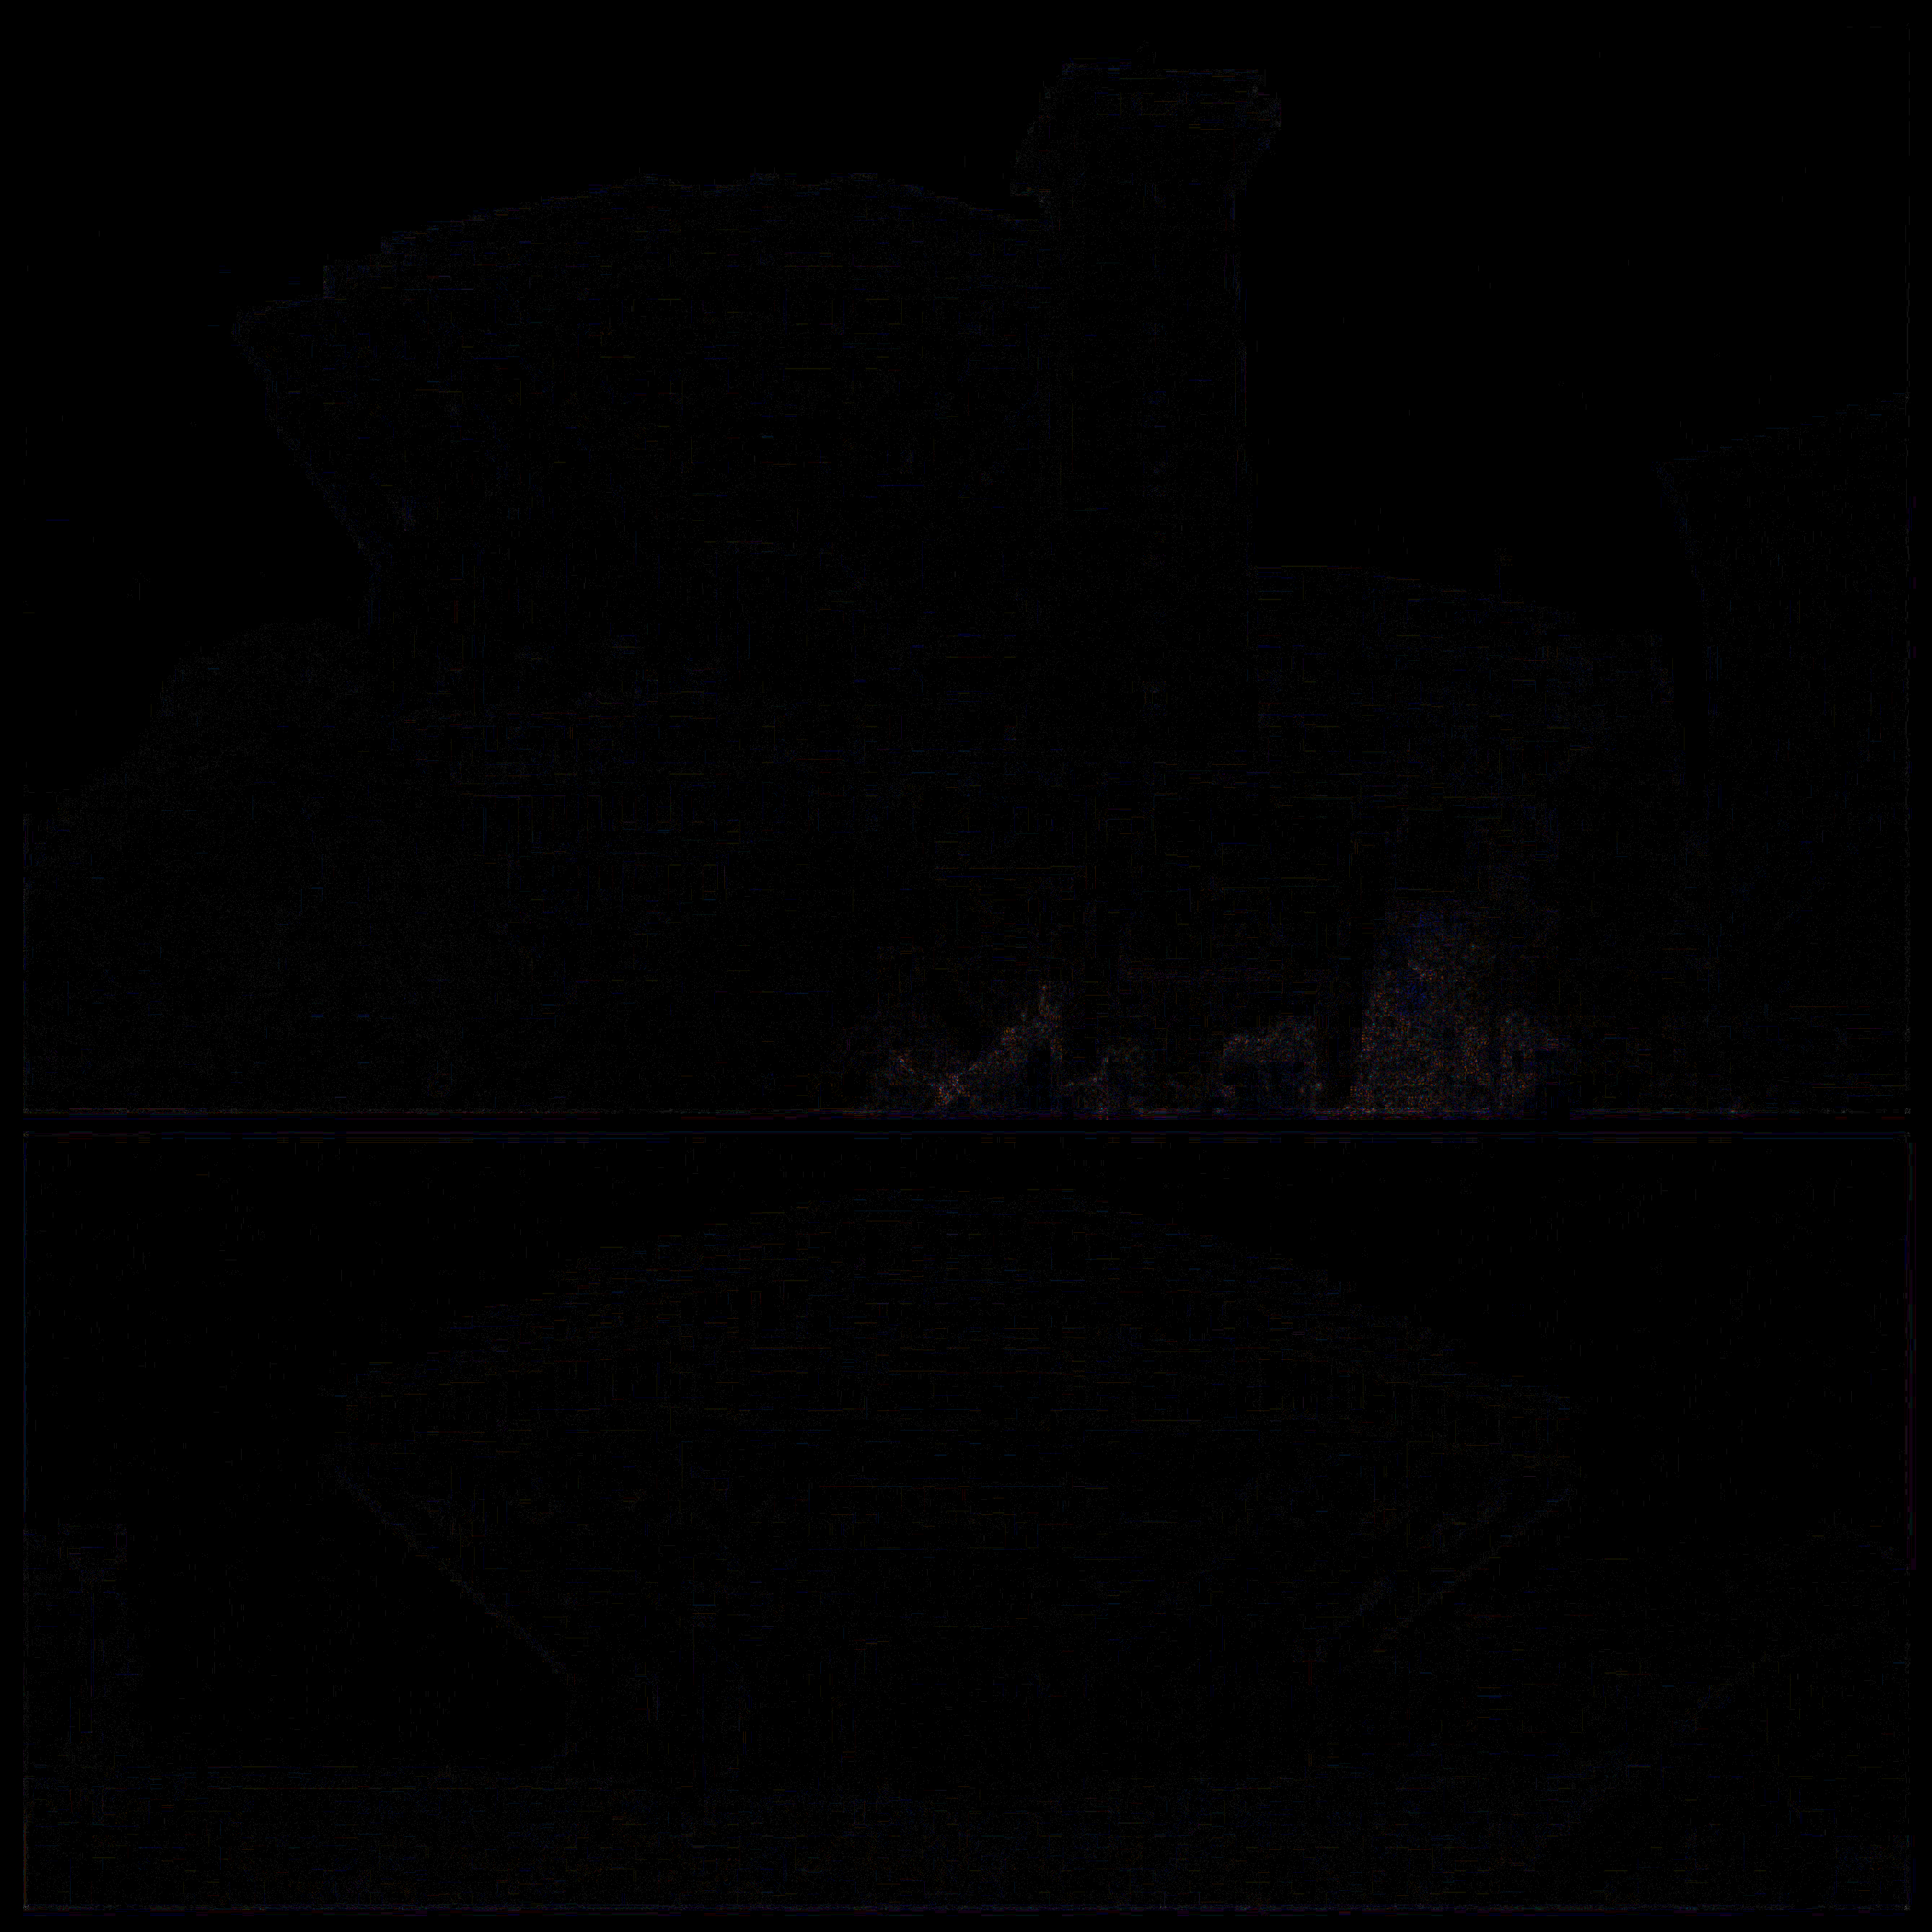

In [29]:
from PIL import Image, ImageChops, ImageEnhance
import sys, os.path

filename = 'data/geisel.jpg'
resaved = filename + '.resaved.jpg'
ela = filename + '.ela.png'

im = Image.open(filename)

im.save(resaved, 'JPEG', quality=95)
resaved_im = Image.open(resaved)

ela_im = ImageChops.difference(im, resaved_im)
extrema = ela_im.getextrema()
max_diff = max([ex[1] for ex in extrema]) #ex[1]
scale = 255.0/max_diff

ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)

print("Maximum difference was = "+str(max_diff))
ela_im.save(ela)
display(ela_im)